What is Neural Network?

A neural network is a computational model inspired by the human brain's structure and functioning. It's a set of algorithms designed to recognize patterns and process information. Neural networks consist of interconnected nodes, called neurons or units, organized in layers.
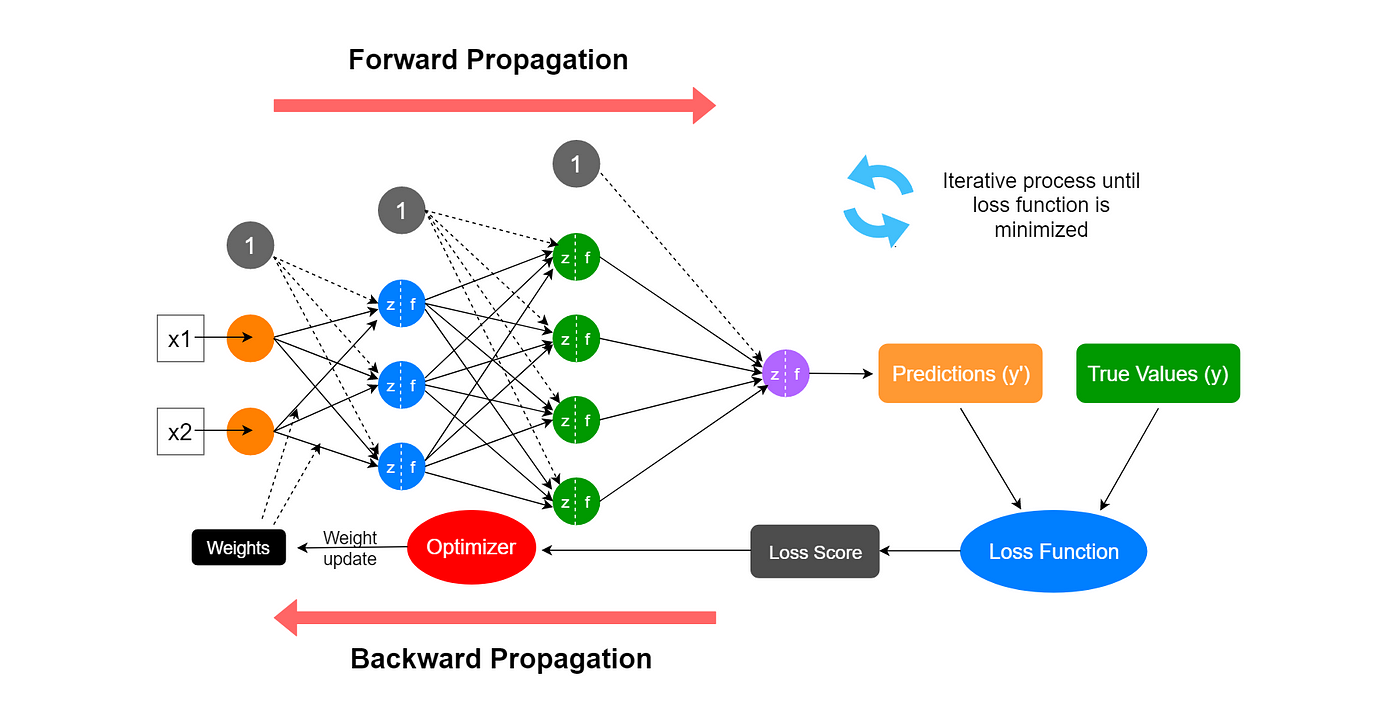
**Key Components:**

Neurons/Nodes:
Neurons are the basic units that receive input, apply a transformation, and produce an output.
Each neuron performs a simple computation, taking weighted inputs, applying an activation function, and passing the result to the next layer.

**Layers:**<br>
Neurons are organized in layers: input layer, hidden layers (intermediate layers), and output layer.
Information flows from the input layer through the hidden layers to the output layer.
Weights and Connections:

Connections between neurons have associated weights that modulate the signal between them.
During training, these weights are adjusted to optimize the network's performance on a specific task.
Activation Functions:

Activation functions introduce non-linearities, allowing neural networks to learn complex relationships in the data.
Common activation functions include sigmoid, tanh, ReLU (Rectified Linear Unit), etc.

***How it Works:***
**Forward Propagation:**

Input data is fed into the network, and computations are performed layer by layer until the output is generated.
Each layer's output becomes the input for the next layer after undergoing transformations via weights and activation functions.

**Training (Learning):**

Neural networks learn by adjusting their weights during a training phase using algorithms like backpropagation.
Backpropagation calculates the gradient of the loss function with respect to the network's weights, allowing updates that minimize the loss.
Prediction/Inference:

Once trained, the neural network can make predictions or classifications on new, unseen data.

**Types of Neural Networks:**

**Feedforward Neural Networks (FNN):**

Information flows in one direction, from input to output, without cycles.
Commonly used in tasks like classification and regression.
<br>
**Recurrent Neural Networks (RNN):**

Suitable for sequential data as they have connections between neurons that form loops, allowing information persistence over time.
Used in tasks like language modeling, time series prediction.


**Convolutional Neural Networks (CNN):**

Specialized for processing grid-like data, such as images.
Consist of convolutional layers that capture spatial hierarchies in the data.

**Generative Adversarial Networks (GAN):**

Comprise two networks (generator and discriminator) that compete against each other to generate realistic data samples.


**Convolutional Neural Networks (CNN)**
<br>
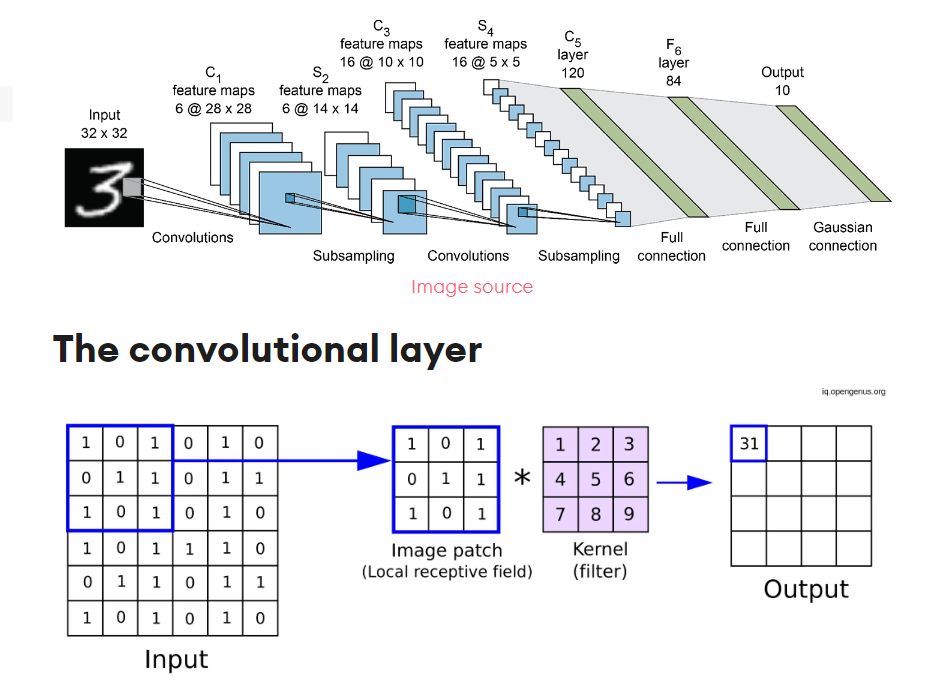

***Implementation of CNN for FashionMNIST dataset for simple classification***

Importing necessary packages

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

TensorFlow is an open-source machine learning framework developed by the Google Brain team. It provides tools and libraries for building and deploying machine learning models, particularly neural networks. TensorFlow is widely used for various machine learning tasks, including but not limited to:

**Deep Learning:** TensorFlow enables the creation and training of neural networks for tasks like image classification, object detection, natural language processing, and more.

**Numerical Computations:** It's adept at performing complex numerical computations, especially with large datasets, utilizing optimized computational graph execution.

**Model Deployment:** TensorFlow allows models to be deployed across various platforms, including mobile devices and servers.


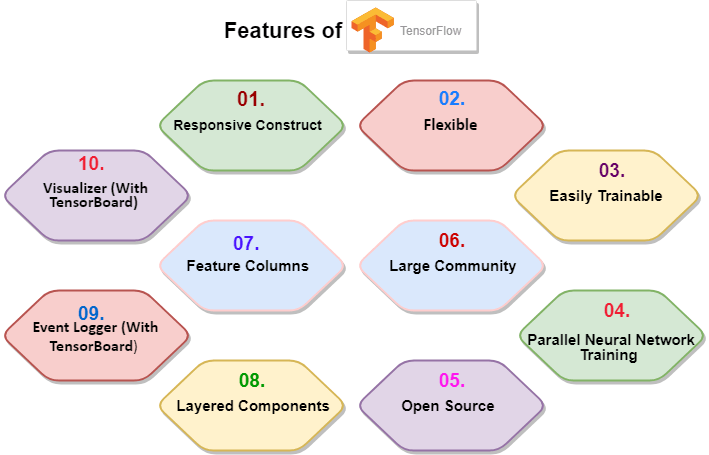

In [20]:
# Load Fashion MNIST data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

Display some images from dataset to do the sanity check

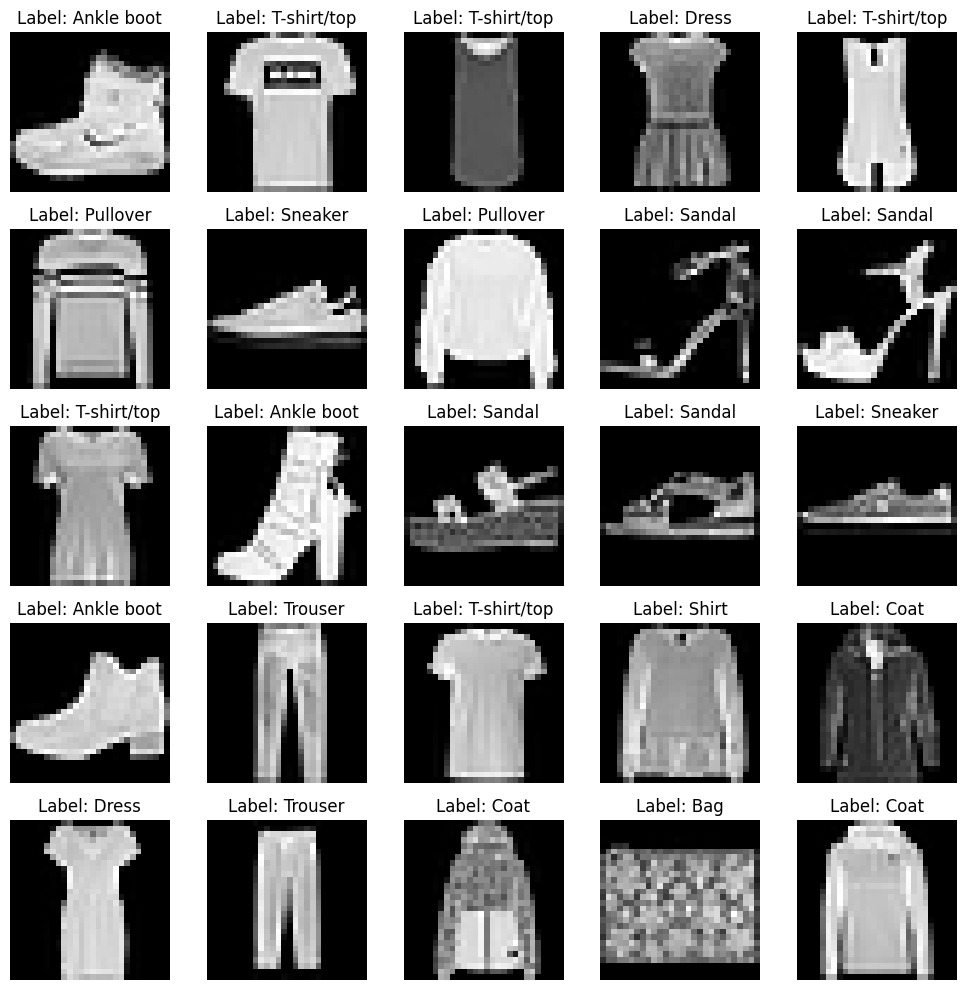

In [21]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {class_names[train_labels[i]]}")
    plt.axis('off')  # Hide axis
plt.tight_layout()
plt.show()

**Image and label processing**

normalizing images to get the pixel value to [-1,1]

converting the labels of images to catagorical labels for the training

In [22]:
test_labels[0]

9

In [23]:
# Data preprocessing
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

#one hot encoding <we disucssed this in last workshop>
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [24]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

**Defining the CNN architecture for the model**

In [25]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for Fashion MNIST


**Train the model**

In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5250 - accuracy: 0.8058 - val_loss: 0.3734 - val_accuracy: 0.8675
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3351 - accuracy: 0.8781 - val_loss: 0.3099 - val_accuracy: 0.8873
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2850 - accuracy: 0.8967 - val_loss: 0.2883 - val_accuracy: 0.8958
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2561 - accuracy: 0.9054 - val_loss: 0.2753 - val_accuracy: 0.8975
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2299 - accuracy: 0.9160 - val_loss: 0.2715 - val_accuracy: 0.9019
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2093 - accuracy: 0.9235 - val_loss: 0.2549 - val_accuracy: 0.9092
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1898 - accuracy: 0.9292 - val_loss: 0.2661 - val_accuracy

**Test the model**

In [27]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2931 - accuracy: 0.9036
Test accuracy: 0.9035999774932861


**Check the pridiction for random input image from test data**

In [28]:
import random

random_numbers = random.sample(range(5001), 5)
print(random_numbers)

[4910, 3474, 2921, 1686, 2274]


1/1 [==============================] - 0s 18ms/step


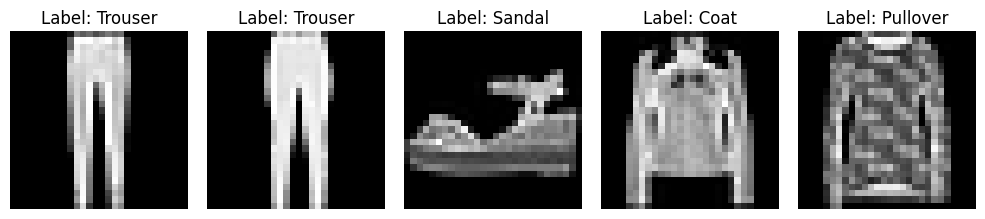

In [29]:
# Display some test images and their prediction by model

random_numbers = random.sample(range(5000), 5)

plt.figure(figsize=(10, 10))
k=0
for i in random_numbers:
  k=k+1
  plt.subplot(5, 5, k)
  plt.imshow(test_images[i], cmap='gray')
  #predicting lable
  pred_label = np.argmax(model.predict((np.array([test_images[i]])))[0])

  plt.title(f"Label: {class_names[pred_label]}")
  plt.axis('off')  # Hide axis
plt.tight_layout()
plt.show()

**Let's plot the training and validation accuracy and loss **

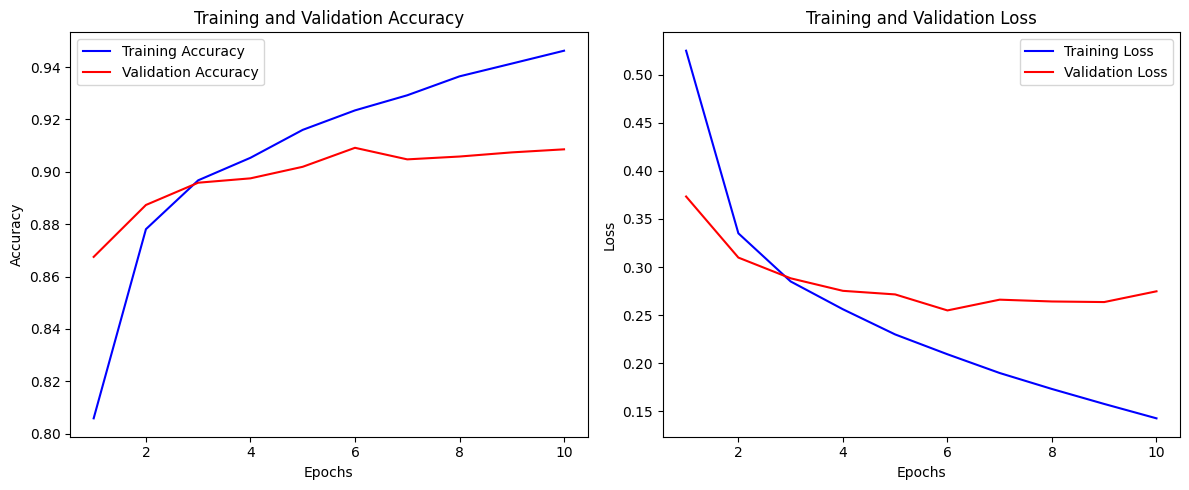

In [30]:
# Accessing training history
history_dict = history.history

# Extracting training and validation accuracy and loss
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()